# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [2]:
import pandas as pd

In [11]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '지역구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [12]:
standard

,도착 시군구 코드,지역구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [38]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8', thousands=',')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [39]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='지역구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')
df = pd.merge(df,df_seoul_business,how='inner', on='지역구')
df = pd.merge(df,df_seoul_people,how='inner', on='지역구')

In [40]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 승차 승객 평균이 많을 수록
df.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'], axis=1, inplace=True)
df.head()

,도착 시군구 코드,지역구,버스정류장ARS번호,노선번호,승차총승객수,하차총승객수,승차총승객수평균,하차총승객수평균,평균 이동 시간(분),이동인구(합),...,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,세대,남자,여자,계,세대당인구,65세이상고령자
0,11010,종로구,350,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,...,962,1413,382,1982,73766,74018,79666,153684,1.96,28064
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,...,24248,982,175,2121,63767,63869,67581,131450,1.92,24742
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.364786,36.903883,...,317,1332,573,1184,111207,114571,121947,236518,2.00,39461
3,11040,성동구,436,58,2807280,2746738,96.377369,94.298888,21.740324,42.685596,...,1572,621,1494,1545,134533,141662,149947,291609,2.12,46896
4,11050,광진구,272,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,...,687,1577,1646,1678,169483,169525,183585,353110,2.01,52604


In [58]:
df.columns


Index(['도착 시군구 코드', '지역구', '버스정류장ARS번호', '노선번호', '승차총승객수', '하차총승객수',
       '승차총승객수평균', '하차총승객수평균', '평균 이동 시간(분)', '이동인구(합)', '이동 시간 총합(분)',
       '이동인구 총합(합)', '택시운송업.1', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1',
       '부동산 중개 및 대리업.1', '두발미용업.1', '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업.1',
       '일반 교과 학원.1', '한식 육류요리 전문점.1', '세대', '남자', '여자', '계', '세대당인구',
       '65세이상고령자', '종사자수'],
      dtype='object')

In [57]:
df['종사자수'] = df.iloc[:,[12,13,14,15,16,17,18,19,20]].sum(axis=1)

In [42]:
df.corr()

,도착 시군구 코드,버스정류장ARS번호,노선번호,승차총승객수,하차총승객수,승차총승객수평균,하차총승객수평균,평균 이동 시간(분),이동인구(합),이동 시간 총합(분),...,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,세대,남자,여자,계,세대당인구,65세이상고령자
도착 시군구 코드,1.000000,0.440297,-0.069435,0.440756,0.441705,0.017980,0.029956,0.533514,0.610548,0.235541,...,-0.157478,0.318339,0.504141,0.342618,0.661483,0.697314,0.675779,0.687074,0.348330,0.589508
버스정류장ARS번호,0.440297,1.000000,0.244965,0.558126,0.570208,-0.163913,-0.126640,0.226804,0.371603,0.350056,...,-0.424815,0.316528,0.295429,0.293974,0.561636,0.555579,0.585168,0.571694,0.313925,0.563072
노선번호,-0.069435,0.244965,1.000000,0.665488,0.652642,0.493541,0.470440,-0.678600,-0.003649,0.388332,...,0.282179,0.262016,-0.058862,0.264624,-0.241699,-0.294351,-0.268906,-0.281536,-0.295018,-0.334297
승차총승객수,0.440756,0.558126,0.665488,1.000000,0.996610,0.538720,0.547384,-0.110113,0.474049,0.581339,...,-0.024010,0.493852,0.404332,0.522268,0.408783,0.359532,0.368034,0.364433,-0.015831,0.295889
하차총승객수,0.441705,0.570208,0.652642,0.996610,1.000000,0.534826,0.555137,-0.097082,0.463898,0.572769,...,-0.051134,0.485755,0.372778,0.491315,0.443088,0.384499,0.390470,0.388119,-0.039725,0.322254
승차총승객수평균,0.017980,-0.163913,0.493541,0.538720,0.534826,1.000000,0.989288,-0.382202,-0.079733,0.140483,...,0.114406,0.220043,-0.145105,0.073557,-0.159581,-0.255715,-0.282278,-0.269854,-0.503971,-0.306123
하차총승객수평균,0.029956,-0.126640,0.470440,0.547384,0.555137,0.989288,1.000000,-0.356171,-0.072466,0.148381,...,0.059175,0.227213,-0.174517,0.043023,-0.080242,-0.192074,-0.221558,-0.207643,-0.531749,-0.243298
평균 이동 시간(분),0.533514,0.226804,-0.678600,-0.110113,-0.097082,-0.382202,-0.356171,1.000000,0.373091,-0.141914,...,-0.259089,-0.034993,0.253965,0.024519,0.599707,0.644669,0.631852,0.638885,0.414361,0.712731
이동인구(합),0.610548,0.371603,-0.003649,0.474049,0.463898,-0.079733,-0.072466,0.373091,1.000000,0.808313,...,0.159884,0.615303,0.773505,0.831975,0.619580,0.681313,0.708455,0.696328,0.449659,0.531426
이동 시간 총합(분),0.235541,0.350056,0.388332,0.581339,0.572769,0.140483,0.148381,-0.141914,0.808313,1.000000,...,0.295174,0.655550,0.513115,0.832354,0.344073,0.350985,0.393565,0.373570,0.134222,0.186226


In [37]:
# plt.figure(figsize = (8, 8))
# sns.heatmap(df.corr(), 
#             annot = True,            # 숫자(상관계수) 표기 여부
#             fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
#             cmap = 'RdYlBu_r',       # 칼라맵
#             vmin = -1, vmax = 1)     # 값의 최소, 최대값값
# plt.show()

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

1. 65세 이상 고령자의 수와 노선의 수는 관계가 있을 것이다. 
2. 세대 수와 정류장 수는 관련이 있을 것이다.
3. 지역 별 종사자 수와 노선 수 혹은 정류장 수는 관련이 있다. 

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [80]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid') 

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

### 1)


In [117]:
df['노인인구비율'] = df['65세이상고령자']/df['계']

PearsonRResult(statistic=-0.27925844067423633, pvalue=0.17641224240316894)

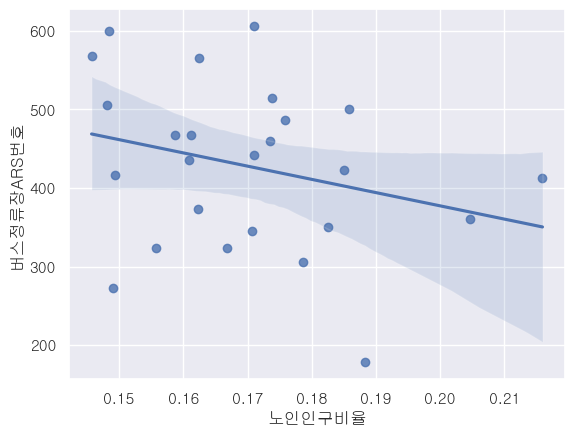

In [124]:
sns.regplot(x='노인인구비율', y='버스정류장ARS번호', data=df)
spst.pearsonr(df['노인인구비율'],df['버스정류장ARS번호'])

In [99]:
df.sort_values(by='65세이상고령자', ascending=False).head(10)

,도착 시군구 코드,지역구,버스정류장ARS번호,노선번호,승차총승객수,하차총승객수,승차총승객수평균,하차총승객수평균,평균 이동 시간(분),이동인구(합),...,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,세대,남자,여자,계,세대당인구,65세이상고령자,종사자수
23,11240,송파구,416,55,5641742,5603488,114.270072,113.495260,25.429707,83.493581,...,1469,4160,2781,285106,321963,346298,668261,2.32,99854,29890
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.447282,...,1709,2347,2274,272572,277797,300629,578426,2.10,93924,24757
10,11110,노원구,515,57,4353295,4292724,88.476211,87.245168,24.029515,55.184590,...,844,3281,1557,219065,247417,267028,514445,2.33,89426,18862
11,11120,은평구,501,71,5201660,5122499,106.395173,104.776007,24.611578,50.260428,...,925,1793,1639,215178,227172,248841,476013,2.19,88418,15509
20,11210,관악구,468,86,7655819,7792476,154.753674,157.516040,23.377928,49.904036,...,1672,1230,1628,279353,250450,249886,500336,1.74,80686,16197
22,11230,강남구,506,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,...,2528,9020,5008,234612,257096,280242,537338,2.27,79575,54394
7,11080,성북구,606,99,6236424,6231238,123.251922,123.149430,22.160283,45.816273,...,1030,1755,1334,197296,212277,230403,442680,2.20,75719,13843
24,11250,강동구,373,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,...,1349,2104,1459,201926,227891,237206,465097,2.28,75477,19899
16,11170,구로구,486,79,4942197,4730992,119.235615,114.140076,22.933748,41.739382,...,1165,1111,1496,181916,208027,211957,419984,2.18,73864,15313
6,11070,중랑구,423,48,3792541,3740923,87.403863,86.214261,23.412789,41.012753,...,1000,1045,1504,187693,193623,199977,393600,2.07,72851,16196


In [82]:
#sns.histplot(x='65세이상고령자',data=df, bins=25)

### 2)

PearsonRResult(statistic=0.5616360599559438, pvalue=0.0034839396173832644)

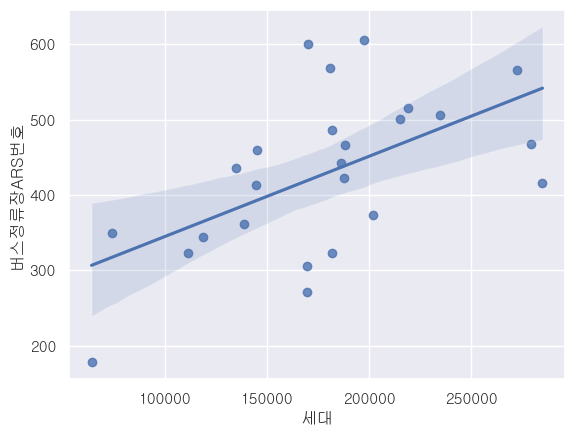

In [83]:
sns.regplot(x='세대', y='버스정류장ARS번호', data=df)
spst.pearsonr(df['세대'],df['버스정류장ARS번호'])

In [135]:
#sns.regplot(x='지역구',y='세대',data=df)
df.loc[(df['세대']>150000) & (df['버스정류장ARS번호']<400)].sort_values(by='노선번호')

,도착 시군구 코드,지역구,버스정류장ARS번호,노선번호,승차총승객수,하차총승객수,승차총승객수평균,하차총승객수평균,평균 이동 시간(분),이동인구(합),...,일반 교과 학원.1,한식 육류요리 전문점.1,세대,남자,여자,계,세대당인구,65세이상고령자,종사자수,노인인구비율
24,11250,강동구,373,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,...,2104,1459,201926,227891,237206,465097,2.28,75477,19899,0.162282
4,11050,광진구,272,41,2749448,2753411,118.352546,118.523137,22.474283,46.762548,...,1646,1678,169483,169525,183585,353110,2.01,52604,14037,0.148973
14,11150,양천구,323,56,4009172,3851173,97.627526,93.780086,22.793734,46.544142,...,5804,1111,181765,219882,229496,449378,2.45,69953,19909,0.155666
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,...,984,1509,169695,172318,180274,352592,1.99,62963,13728,0.178572


In [112]:
# plt.figure(figsize=(20,15))
# plt.scatter(x='지역구',y='세대', data=df)
# 인구가 많은 지역은? 인구가 많으면서 이동인구가 많은 지역
# 인구는 많은데 이동인구도 많은데, 노선 수가 적은 지역에 노선이 추가되어야 한다. 
# 고령인구의 비율

# 그렇다면 강동구, 광진구, 양천구, 동대문구
# 동대문구에서

In [134]:
# 승차 승객이 많을 것이라 판단. 그렇다면 이 구에 승차 인원이 많은지 확인
temp = df.sort_values(by='승차총승객수평균', ascending=False).head(10)
#df.loc[df['승차총승객수평균']>100].sort_values(by= '승차총승객수평균', ascending=False)

PearsonRResult(statistic=-0.16391253611349244, pvalue=0.4336732394677362)

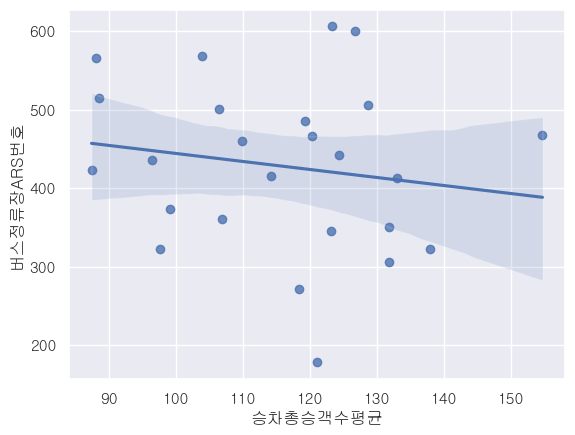

In [133]:
sns.regplot(x='승차총승객수평균', y='버스정류장ARS번호', data=df)
spst.pearsonr(df['승차총승객수평균'],df['버스정류장ARS번호'])

### 3)

In [136]:
# sns.regplot(x='종사자수', y='노선번호', data=df)
# spst.pearsonr(df['종사자수'],df['노선번호'])

PearsonRResult(statistic=-0.6786000547455109, pvalue=0.00019237294667152178)

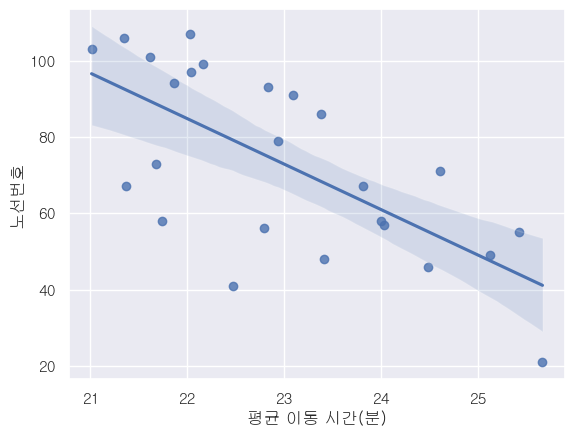

In [137]:
sns.regplot(x='평균 이동 시간(분)', y='노선번호', data=df)
spst.pearsonr(df['평균 이동 시간(분)'],df['노선번호'])
#평균 이동시간이 길면 노선이 적다. 

In [129]:
df.loc[(df['평균 이동 시간(분)']>23)&(df['노선번호']<60)]

,도착 시군구 코드,지역구,버스정류장ARS번호,노선번호,승차총승객수,하차총승객수,승차총승객수평균,하차총승객수평균,평균 이동 시간(분),이동인구(합),...,일반 교과 학원.1,한식 육류요리 전문점.1,세대,남자,여자,계,세대당인구,65세이상고령자,종사자수,노인인구비율
6,11070,중랑구,423,48,3792541,3740923,87.403863,86.214261,23.412789,41.012753,...,1045,1504,187693,193623,199977,393600,2.07,72851,16196,0.185089
9,11100,도봉구,361,46,3304305,3211421,106.859356,103.855540,24.489976,37.882283,...,1162,943,138836,154440,163660,318100,2.28,65122,13526,0.204722
10,11110,노원구,515,57,4353295,4292724,88.476211,87.245168,24.029515,55.184590,...,3281,1557,219065,247417,267028,514445,2.33,89426,18862,0.173830
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.447282,...,2347,2274,272572,277797,300629,578426,2.10,93924,24757,0.162379
17,11180,금천구,345,58,3776658,3581930,123.098370,116.751304,23.998944,30.597875,...,487,1042,118697,123959,120942,244901,1.95,41819,13272,0.170759
23,11240,송파구,416,55,5641742,5603488,114.270072,113.495260,25.429707,83.493581,...,4160,2781,285106,321963,346298,668261,2.32,99854,29890,0.149424
24,11250,강동구,373,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,...,2104,1459,201926,227891,237206,465097,2.28,75477,19899,0.162282


In [126]:
df.to_csv("result.csv", index = False)

## 3.이변량 분석
* 상관 분석만 하면 된다. 범주형 데이터가 없기 때문이다. 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [ ]:
target = 

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [55]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

NameError: name 'X' is not defined

In [127]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

# sns.heatmap(df.corr(), annot = True)
# plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출
* 양천구에 정류장이 가장 적은데, 상권 업종들이 양천구에 많다. 양천구의 유동인구 수요가 많아질 것이기에 정류장을 설치해야 한다. 
### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

In [138]:
data = pd.read_csv('final_data4.csv')

In [139]:
data.head()

,Unnamed: 0,자치구,심야정류장수,심야노선수,승차승객수(합),하차승객수(합),승차승객수(평균),하차승객수(평균),출발 시군구 코드,심야이동인구(합),심야이동인구(E*),심야이동인구(W*),심야이동인구(H*),주점수,육류업수,주점 및 육류요리집수,인구(합),인구(남성),인구(여성),65세이상고령자
0,0,강남구,75,4,28397,24803,6.796793,5.936573,11230,2061301.10,1077933.41,786423.23,196944.46,713,827,1540,537338,257096,280242,79575
1,1,강동구,42,1,8036,7905,6.608553,6.500822,11250,755668.75,321455.32,275270.13,158943.30,589,428,1017,465097,227891,237206,75477
2,2,강북구,16,3,9634,10079,5.734524,5.999405,11090,457773.82,223230.55,169435.58,65107.69,580,362,942,300824,145934,154890,64961
3,3,강서구,85,4,14750,17556,2.952362,3.514011,11160,799442.75,366593.95,281762.45,151086.35,794,581,1375,578426,277797,300629,93924
4,4,관악구,49,5,18256,25128,4.725861,6.504789,11210,800882.75,410952.82,261704.61,128225.32,658,422,1080,500336,250450,249886,80686


In [140]:
#심야정류장수와 주점 및 육류요리업종 사업체 수는 관련이 있다.

<AxesSubplot:xlabel='심야정류장수', ylabel='Count'>

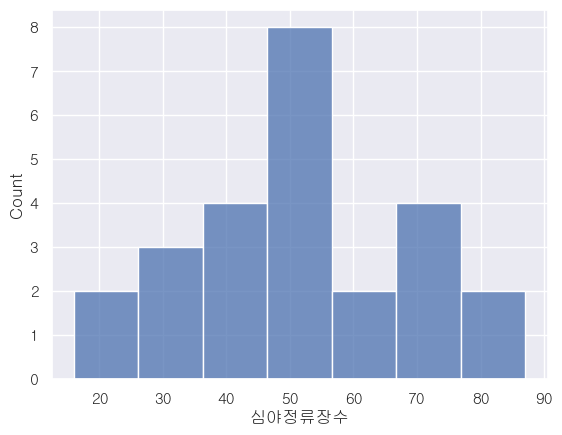

In [143]:
sns.histplot(x='심야정류장수', data=data)

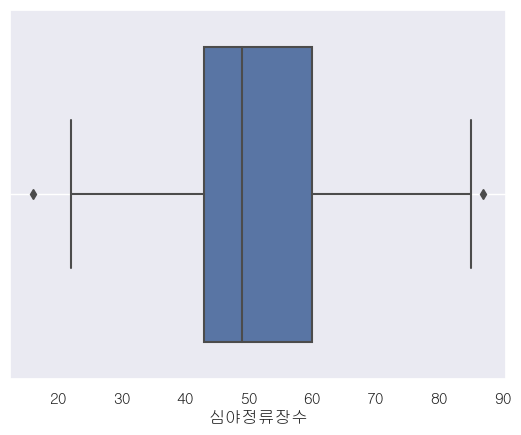

In [146]:
sns.boxplot(x = data['심야정류장수'])
plt.grid()
plt.show()

<AxesSubplot:xlabel='주점 및 육류요리집수', ylabel='Count'>

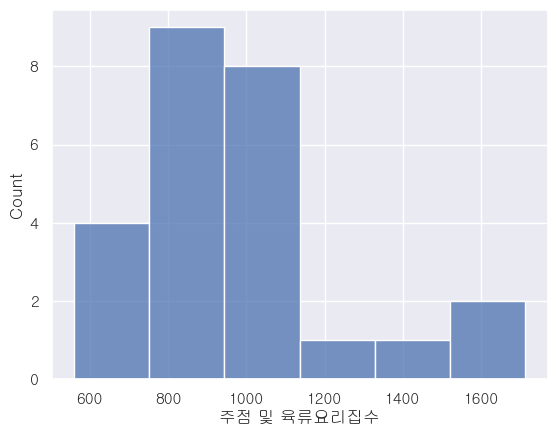

In [144]:
# data['주점 및 육류요리집수']
sns.histplot(x='주점 및 육류요리집수', data=data)

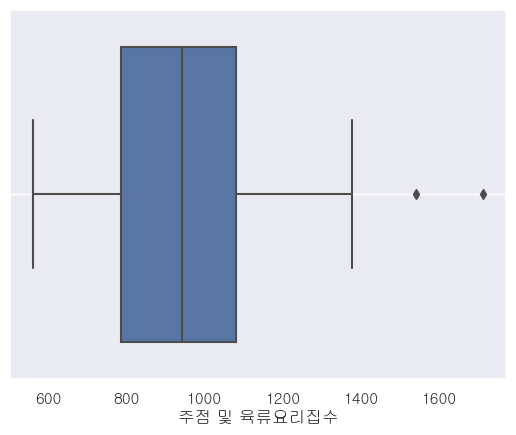

In [145]:
sns.boxplot(x = data['주점 및 육류요리집수'])
plt.grid()
plt.show()

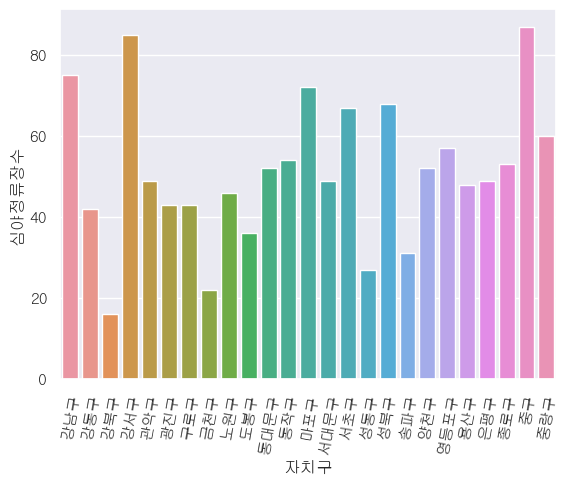

In [154]:
sns.barplot(x='자치구', y = '심야정류장수', data = data)
plt.xticks(rotation=80)
plt.show()

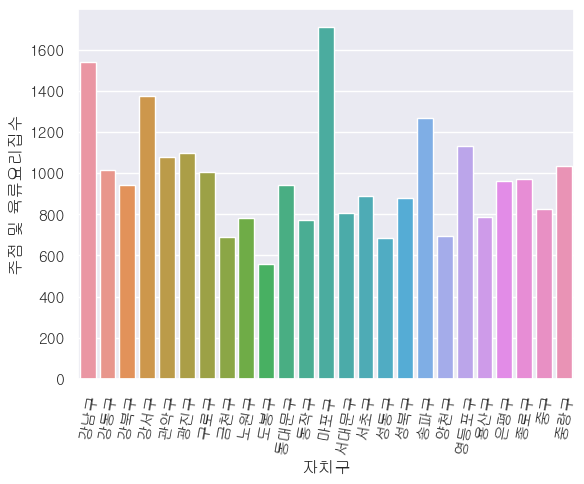

In [155]:
sns.barplot(x='자치구', y = '주점 및 육류요리집수', data = data)
plt.xticks(rotation=80)
plt.show()